<a href="https://colab.research.google.com/github/ashikshafi08/Learning-Fastai/blob/main/Comp/See_in_the_dark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
!nvidia-smi

Wed Jul 14 09:43:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
long_exp = '/content/drive/MyDrive/dark_data/png_format/Sony/long'
short_exp = '/content/drive/MyDrive/dark_data/png_format/Sony/short'

In [4]:
import random 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

im_p = long_exp +'/' +  random.choice(os.listdir(long_exp))

In [5]:
def plot_images(long = True):
  from matplotlib.pyplot import figure
  rows, columns = 2 , 2
  for i in range(1, 5):
    if long == True: 
      full_path = long_exp +'/' +  random.choice(os.listdir(long_exp))
      img = mpimg.imread(full_path)
      figure(figsize=(10, 6))
      plt.subplot(rows , columns , i)
      plt.imshow(img)
      plt.axis(False)
    else:
      full_path = short_exp +'/' +  random.choice(os.listdir(short_exp))
      img = mpimg.imread(full_path)
      figure(figsize=(10, 6))
      plt.subplot(rows , columns , i)
      plt.axis(False)
      plt.imshow(img)

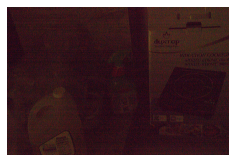

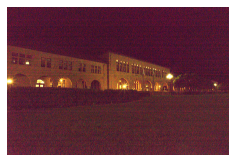

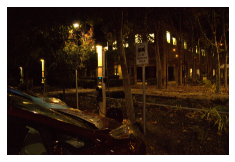

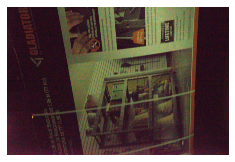

In [6]:
plot_images(long = False)

In [7]:
!pip install fastai -q --upgrade

     |████████████████████████████████| 194kB 9.3MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 


In [8]:
import pandas as pd 
col_names = ['short_exp' , 'long_exp' , 'ISO' , 'aperture']
# dum = pd.read_csv('/content/drive/MyDrive/dark_data/Sony_train_list.txt' , sep=' ' , names= col_names)
# dum

In [9]:
def apply_transf(jpg_path,filename):
  p = Path(filename)
  part = p.parts
  tot_pat = f'{jpg_path}/{part[-2]}/{part[-1][:-4]}.jpg'
  return tot_pat

def rearrange_df(df,jpg_path = '/content/drive/MyDrive/png_format',mode = ['short_exp','long_exp']):
  """
  rearranges the dataframe (.ARW to .PNG arrangement)
  """
  cp = df
  for m in mode:
    cp[m] = cp[m].apply(lambda x :apply_transf(jpg_path,x))
  return cp

In [10]:
import os 
os.listdir('/content/drive/MyDrive/dark_data/png_format/Sony/short/')[:10] ,os.listdir('/content/drive/MyDrive/dark_data/png_format/Sony/long/')[:10] 

(['00154_02_0.1s.jpg',
  '00154_03_0.1s.jpg',
  '00154_04_0.1s.jpg',
  '00154_05_0.1s.jpg',
  '00154_06_0.1s.jpg',
  '00154_07_0.1s.jpg',
  '00154_08_0.1s.jpg',
  '00154_09_0.1s.jpg',
  '00155_00_0.1s.jpg',
  '00155_01_0.1s.jpg'],
 ['.ipynb_checkpoints',
  '00090_00_30s.jpg',
  '00091_00_30s.jpg',
  '00092_00_30s.jpg',
  '10093_00_30s.jpg',
  '00072_00_30s.jpg',
  '00073_00_30s.jpg',
  '10074_00_30s.jpg',
  '00075_00_30s.jpg',
  '00076_00_30s.jpg'])

In [11]:
def preprocess_dataframe(txt_path , add_path):
  '''
  Pass a txt_path and this function does the following things: 
  1. Load in the txt file as a dataframe and add the right column names
  2. Remove the dots trailing with each element in a row
  5. Add a full path 
  '''
  # Column names
  col_names = ['short_exp' , 'long_exp' , 'ISO' , 'aperture']

  # Loading the txt and renaming the columns 
  df = pd.read_csv(txt_path , sep = ' ' , names = col_names)

  # Remove the trailing dots and adding full directory path 
  for col in df.columns[:2]:
    df[col] = df[col].apply(lambda x: x[:-3]) + 'jpg'
    df[col] = df[col].apply(lambda x: x[1:])
    df[col] = add_path + df[col].astype(str)

  return df 

In [12]:
import pandas as pd
train_df = preprocess_dataframe(txt_path = '/content/drive/MyDrive/dark_data/Sony_train_list.txt',add_path='/content/drive/MyDrive/dark_data/png_format')
val_df = preprocess_dataframe(txt_path = '/content/drive/MyDrive/dark_data/Sony_val_list.txt',add_path='/content/drive/MyDrive/dark_data/png_format')
test_df = preprocess_dataframe(txt_path = '/content/drive/MyDrive/dark_data/Sony_test_list.txt',add_path='/content/drive/MyDrive/dark_data/png_format')

# Shape of the dataset 
train_df.shape , val_df.shape , test_df.shape

((1865, 4), (234, 4), (598, 4))

In [13]:
train_df.head()

,short_exp,long_exp,ISO,aperture
0,/content/drive/MyDrive/dark_data/png_format/So...,/content/drive/MyDrive/dark_data/png_format/So...,ISO200,F8
1,/content/drive/MyDrive/dark_data/png_format/So...,/content/drive/MyDrive/dark_data/png_format/So...,ISO200,F8
2,/content/drive/MyDrive/dark_data/png_format/So...,/content/drive/MyDrive/dark_data/png_format/So...,ISO200,F8
3,/content/drive/MyDrive/dark_data/png_format/So...,/content/drive/MyDrive/dark_data/png_format/So...,ISO200,F8
4,/content/drive/MyDrive/dark_data/png_format/So...,/content/drive/MyDrive/dark_data/png_format/So...,ISO200,F8


In [14]:
train_df.short_exp[:10]

0    /content/drive/MyDrive/dark_data/png_format/So...
1    /content/drive/MyDrive/dark_data/png_format/So...
2    /content/drive/MyDrive/dark_data/png_format/So...
3    /content/drive/MyDrive/dark_data/png_format/So...
4    /content/drive/MyDrive/dark_data/png_format/So...
5    /content/drive/MyDrive/dark_data/png_format/So...
6    /content/drive/MyDrive/dark_data/png_format/So...
7    /content/drive/MyDrive/dark_data/png_format/So...
8    /content/drive/MyDrive/dark_data/png_format/So...
9    /content/drive/MyDrive/dark_data/png_format/So...
Name: short_exp, dtype: object

In [15]:
val_df['is_valid'] = True 
train_df['is_valid'] = False
#test_df['is_valid'] = True 

In [16]:
train_data = pd.concat([train_df , val_df] , ignore_index = True)
train_data.head()

,short_exp,long_exp,ISO,aperture,is_valid
0,/content/drive/MyDrive/dark_data/png_format/So...,/content/drive/MyDrive/dark_data/png_format/So...,ISO200,F8,False
1,/content/drive/MyDrive/dark_data/png_format/So...,/content/drive/MyDrive/dark_data/png_format/So...,ISO200,F8,False
2,/content/drive/MyDrive/dark_data/png_format/So...,/content/drive/MyDrive/dark_data/png_format/So...,ISO200,F8,False
3,/content/drive/MyDrive/dark_data/png_format/So...,/content/drive/MyDrive/dark_data/png_format/So...,ISO200,F8,False
4,/content/drive/MyDrive/dark_data/png_format/So...,/content/drive/MyDrive/dark_data/png_format/So...,ISO200,F8,False


In [17]:
df = pd.concat([test_df , train_data] , ignore_index= True)
df.head()

,short_exp,long_exp,ISO,aperture,is_valid
0,/content/drive/MyDrive/dark_data/png_format/So...,/content/drive/MyDrive/dark_data/png_format/So...,ISO200,F9,NaN
1,/content/drive/MyDrive/dark_data/png_format/So...,/content/drive/MyDrive/dark_data/png_format/So...,ISO200,F9,NaN
2,/content/drive/MyDrive/dark_data/png_format/So...,/content/drive/MyDrive/dark_data/png_format/So...,ISO200,F9,NaN
3,/content/drive/MyDrive/dark_data/png_format/So...,/content/drive/MyDrive/dark_data/png_format/So...,ISO200,F9,NaN
4,/content/drive/MyDrive/dark_data/png_format/So...,/content/drive/MyDrive/dark_data/png_format/So...,ISO200,F9,NaN


In [18]:
from fastai.vision.all import * 
from fastai import * 
data_path = '/content/drive/MyDrive/dark_data/png_format/'

In [24]:

def get_dls(bs:int, size:int , path):
  "Generates two `GAN` DataLoaders"
  dblock = DataBlock(blocks=(ImageBlock, ImageBlock),
                     get_x = ColReader('short_exp'),
                   get_y = ColReader('long_exp'), 
                   splitter=RandomSplitter(0.1),
                   item_tfms=Resize(size),
                   batch_tfms=[*aug_transforms(min_scale= 0.3 , size = 224 , batch= True , min_zoom= 0.8),
                               Normalize.from_stats(*imagenet_stats)])
  dls = dblock.dataloaders(path , bs=bs)
  dls.c = 3 # For 3 channel image
  return dls

In [25]:
dls = get_dls(16 , 460, train_df)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


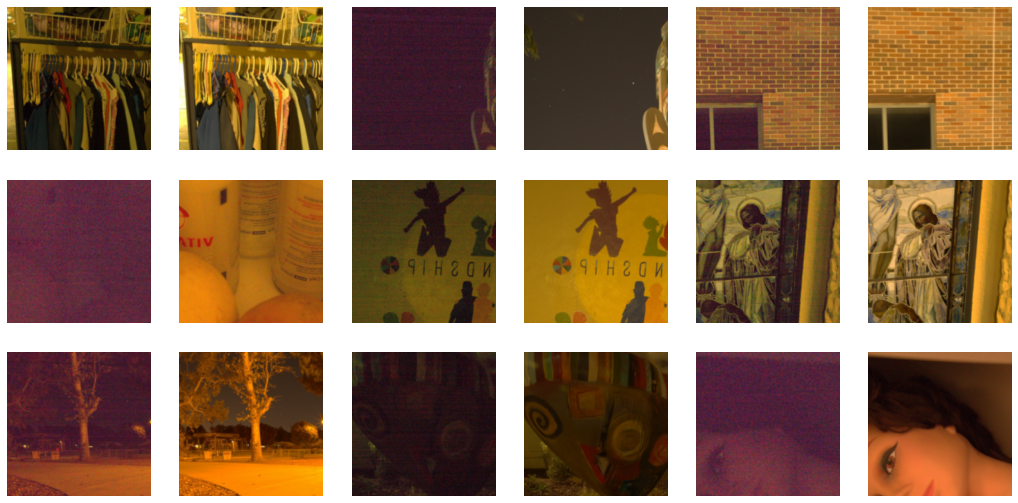

In [ ]:
dls.show_batch()

In [27]:
wd , y_range , loss_gen = 1e-3 , (-3 , 3) , MSELossFlat()
bbone = resnet34


In [28]:
dls.c = 3
from fastai.callback import fp16

In [29]:
def create_gen_learner():
  return unet_learner(blur= True , norm_type= NormType.Weight , self_attention= True , y_range = y_range , 
                      dls = dls , arch = bbone , loss_func = loss_gen , n_out = dls.c).to_fp16()
  
learn_gen = create_gen_learner()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


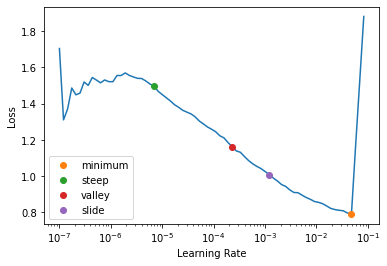

In [30]:
lrs = learn_gen.lr_find(suggest_funcs=(minimum , steep , valley , slide))

In [31]:
learn_gen.fit_one_cycle(3, pct_start=0.8, wd=wd, lr_max = slice(lrs.valley , lrs.slide))

epoch,train_loss,valid_loss,time
0,0.393011,0.258364,17:49
1,0.322791,0.235435,18:25
2,0.263279,0.175399,18:54


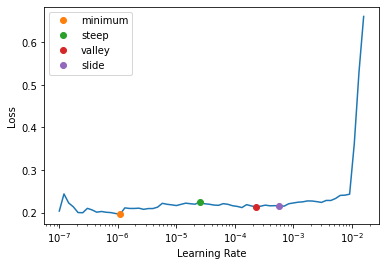

In [32]:
learn_gen.unfreeze()

lrs = learn_gen.lr_find(suggest_funcs=(minimum , steep , valley , slide))

In [ ]:
learn_gen.fit_one_cycle(10 , slice(lrs.valley , lrs.slide) , wd=wd)

epoch,train_loss,valid_loss,time
0,0.199850,0.169964,18:09
1,0.178319,0.115493,18:49
2,0.184487,0.147660,18:41


epoch,train_loss,valid_loss,time
0,0.199850,0.169964,18:09
1,0.178319,0.115493,18:49
2,0.184487,0.147660,18:41
3,0.148520,0.115124,18:43
4,0.133940,0.107507,18:41
5,0.114007,0.094279,18:50
6,0.096602,0.066744,18:58
7,0.084739,0.061343,18:50


In [1]:
learn_gen.show_results(max_n=6, figsize=(12,12))


NameError: ignored

In [ ]:
learn_gen.export(fname= 'drive/MyDrive/dark_data/png_format/models/first_model.pkl')

In [ ]:
inf = load_learner('drive/MyDrive/dark_data/png_format/models/first_model.pkl')

In [ ]:
tne = inf.predict('test.jpg')
plt.imshow(tne / 255)

TypeError: ignored

In [ ]:
plt.imshow(tne.numpy()[0])

In [ ]:
img = tne[0]
img.shape

torch.Size([3, 224, 224])

In [ ]:
img[0][None].shape

torch.Size([1, 224, 224])

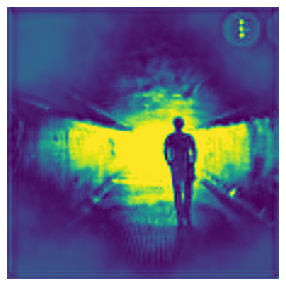

In [ ]:
img[0].show()

In [ ]:
im = plt.imread('/content/test.jpg')
im = im/255.

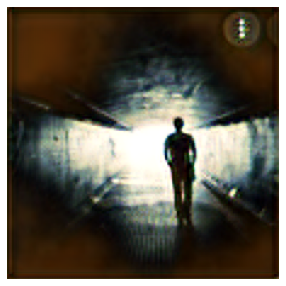

In [ ]:
learn_gen.predict('test.jpg')[0].show()

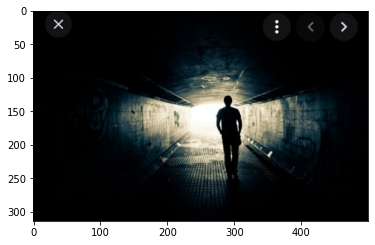

In [ ]:
plt.imshow(im)

In [ ]:
from timm import create_model

ModuleNotFoundError: ignored